**DATA PREPROCESSING**

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
df = pd.read_excel("customer_churn_large_dataset.xlsx")

In [98]:
df.head(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


Check for Missing Data

In [99]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# count of missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

# Total count of missing values
total_missing = missing_values.sum()
print("\nTotal Missing Values in the Dataset:", total_missing)

Missing Values in Each Column:
CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

Total Missing Values in the Dataset: 0


Box-Plot for identifying outliers

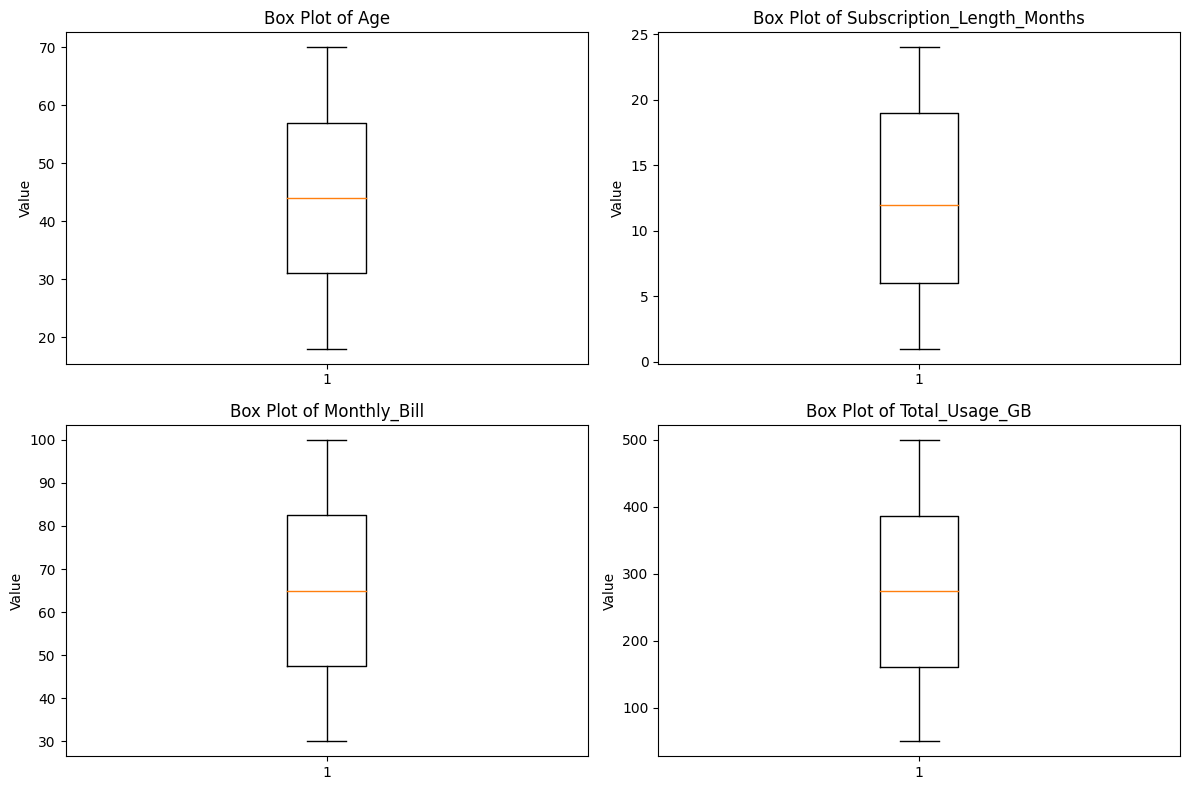

In [100]:
import matplotlib.pyplot as plt

# Select the numeric features for which you want to create box plots
numeric_features = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

# Create box plots for each numeric feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

Encoding Categorical Data

In [101]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables like 'Gender' using Label Encoding
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Location'] = label_encoder.fit_transform(df['Location'])

# # One-Hot Encode categorical variables like 'Location'
# df = pd.get_dummies(df, columns=['Location'], prefix=['Location'])


In [102]:
df = df.drop(columns=['CustomerID', 'Name'])
df.head(5)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0


**FEATURE ENGINEERING**

In [103]:
df['Monthly_Cost_Per_GB'] = df['Monthly_Bill'] / df['Total_Usage_GB']
df['Remaining_Subscription_Months'] = 12 - df['Subscription_Length_Months']
df['Has_Long_Term_Subscription'] = df['Subscription_Length_Months'] > 6

In [104]:
df.head(5)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Monthly_Cost_Per_GB,Remaining_Subscription_Months,Has_Long_Term_Subscription
0,63,1,2,17,73.36,236,0,0.310847,-5,True
1,62,0,4,1,48.76,172,0,0.283488,11,False
2,24,0,2,5,85.47,460,0,0.185804,7,False
3,36,0,3,3,97.94,297,1,0.329764,9,False
4,46,0,3,19,58.14,266,0,0.218571,-7,True


Correlation Matrix for feature selection

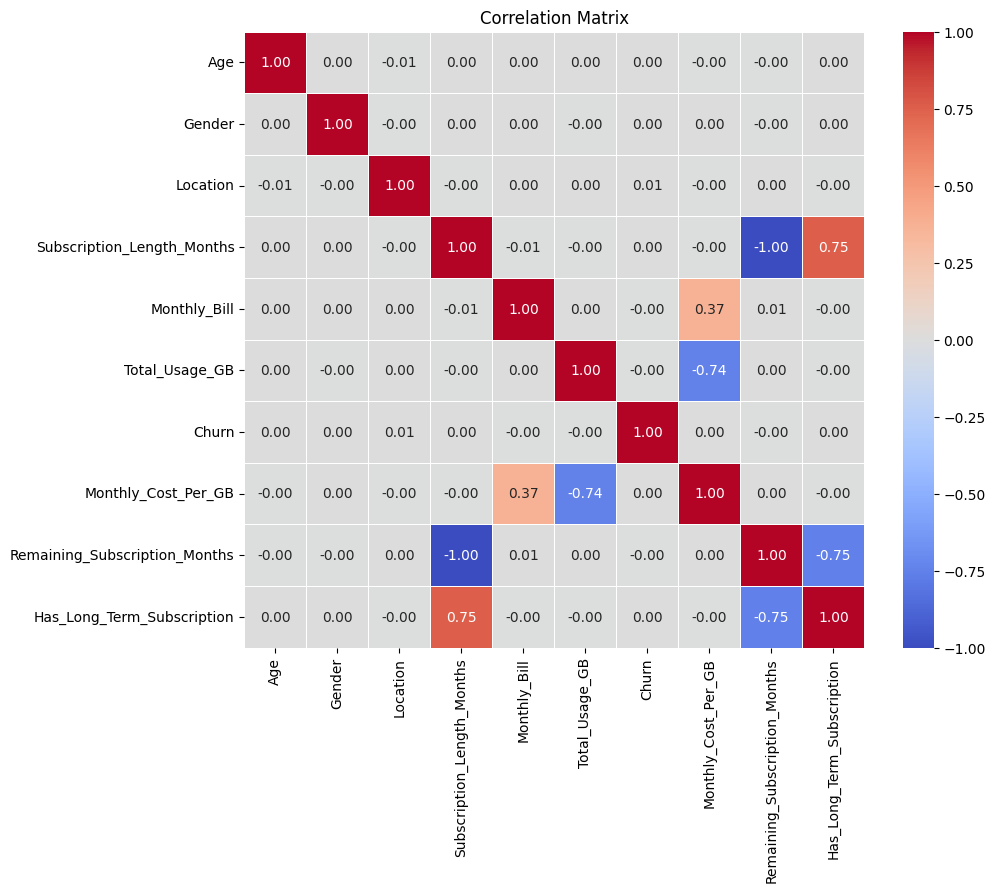

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the plot
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Create the correlation matrix plot using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add labels and title
plt.title("Correlation Matrix")
plt.show()


Train-Test Split (80-20)

In [106]:
from sklearn.model_selection import train_test_split

# Splitting the Data into Training and Testing Sets
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**MODEL BUILDING**

In [107]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the classifiers
random_forest_classifier = RandomForestClassifier(random_state=42)
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
naive_bayes_classifier = GaussianNB()
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Train and evaluate each model
classifiers = {
    'Random Forest': random_forest_classifier,
    'Decision Tree': decision_tree_classifier,
    'Naive Bayes': naive_bayes_classifier,
    'AdaBoost': adaboost_classifier
}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"*** {name} Classifier ***")
    print(f"Accuracy: {accuracy}")
    # print("Confusion Matrix:\n", confusion_mat)
    # print("Classification Report:\n", classification_rep)
    print("\n")


*** Random Forest Classifier ***
Accuracy: 0.5003


*** Decision Tree Classifier ***
Accuracy: 0.5011


*** Naive Bayes Classifier ***
Accuracy: 0.50215


*** AdaBoost Classifier ***
Accuracy: 0.4991




Scaling (standardization)

In [108]:
from sklearn.preprocessing import StandardScaler
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)

logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)
y_pred_logistic = logistic_classifier.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", logistic_accuracy)



KNN Accuracy: 0.4991
Logistic Regression Accuracy: 0.50535


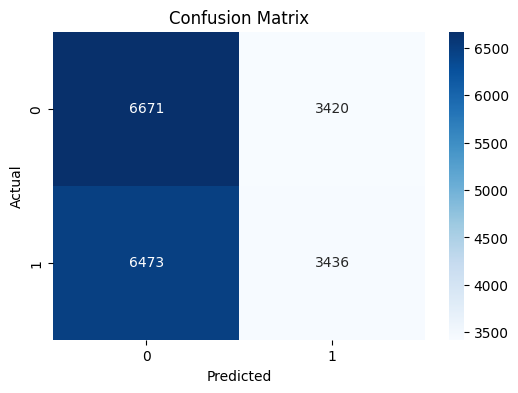

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.66      0.57     10091
           1       0.50      0.35      0.41      9909

    accuracy                           0.51     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.51      0.49     20000



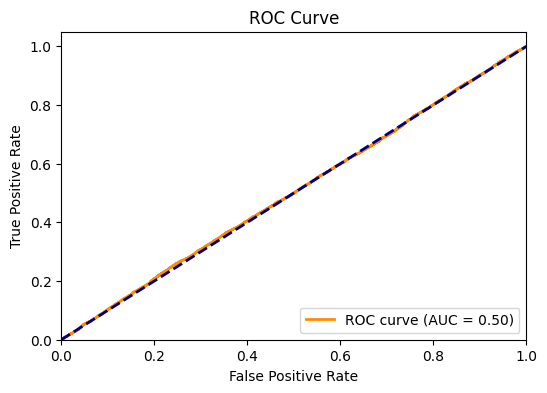

In [110]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Train a Logistic Regression model (assuming you have already trained it)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Model Deployment**

In [113]:

# User Input for Features
print("Please enter the following customer details:")
age = float(input("Age: "))
gender = int(input("Gender (0 for Female, 1 for Male): "))
location = int(input("Location (encoded as per your dataset): "))
subscription_length = float(input("Subscription Length (in months): "))
monthly_bill = float(input("Monthly Bill: "))
total_usage_gb = float(input("Total Usage (in GB): "))

# Create a DataFrame with the user input
user_data = pd.DataFrame({
    'Age': [age],
    'Gender': [gender],
    'Location': [location],
    'Subscription_Length_Months': [subscription_length],
    'Monthly_Bill': [monthly_bill],
    'Total_Usage_GB': [total_usage_gb],
    'Monthly_Cost_Per_GB': [monthly_bill/total_usage_gb],
    'Remaining_Subscription_Months': [12-subscription_length],
    'Has_Long_Term_Subscription': [subscription_length>6]


})

# Predict churn for the user input
predicted_churn = logistic_classifier.predict(user_data)

# Interpret the prediction
if predicted_churn[0] == 1:
    churn_status = "Churned"
else:
    churn_status = "Not Churned"

print(f"\nBased on the provided information, the customer is predicted to be: {churn_status}")


Please enter the following customer details:
Age: 36
Gender (0 for Female, 1 for Male): 0
Location (encoded as per your dataset): 3
Subscription Length (in months): 3
Monthly Bill: 97
Total Usage (in GB): 297

Based on the provided information, the customer is predicted to be: Churned


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
